In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport

%reload_kedro

df = catalog.load("agg_cleaned_excess_deaths")

2020-10-03 18:43:45,338 - root - INFO - ** Kedro project Datathon 2020
2020-10-03 18:43:45,340 - root - INFO - Defined global variable `context` and `catalog`
2020-10-03 18:43:45,348 - root - INFO - Registered line magic `run_viz`
2020-10-03 18:43:45,349 - kedro.io.data_catalog - INFO - Loading data from `agg_cleaned_excess_deaths` (CSVDataSet)...


KeyboardInterrupt: 

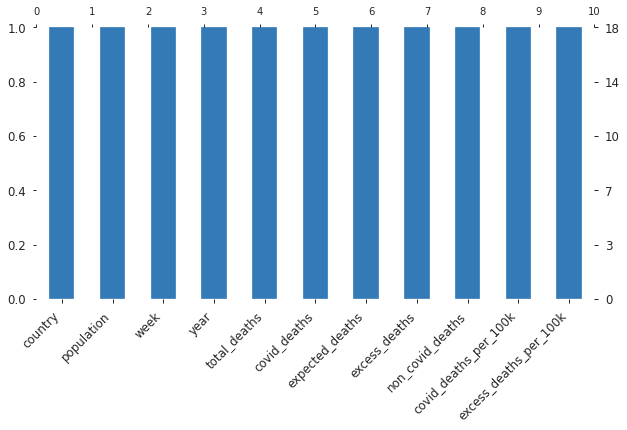

In [27]:
# pf = ProfileReport(df)
# pf.to_widgets()

In [83]:
df2 = catalog.load('exp_wig_data')
df2

2020-10-03 18:43:46,708 - kedro.io.data_catalog - INFO - Loading data from `exp_wig_data` (CSVDataSet)...


,code,countryname,vae,pve,gee,rqe,rle,cce,country
0,ABW,Aruba,42.437984,44.018605,36.077625,35.911062,41.762824,41.152392,aruba
1,ADO,Andorra,44.525938,51.913206,64.018930,44.834910,53.616900,45.479316,andorra
2,AFG,Afghanistan,-40.673794,-94.123225,-51.611272,-47.053070,-60.563001,-52.555862,afghanistan
3,AGO,Angola,-37.295585,-16.996637,-40.008465,-36.564650,-42.480759,-45.267420,angola
4,AIA,Anguilla,9.120063,44.273032,35.979095,33.124656,15.898322,41.887771,anguilla
...,...,...,...,...,...,...,...,...,...
209,YEM,"Yemen, Rep.",-55.345530,-91.955714,-62.256578,-45.215699,-55.326382,-52.351145,"yemen, rep."
210,ZAF,South Africa,23.624497,-6.217150,14.395312,10.400015,1.025921,3.711804,south africa
211,ZAR,"Congo, Dem. Rep.",-51.724972,-75.980536,-58.620834,-53.500089,-61.660389,-52.339857,"congo, dem. rep."
212,ZMB,Zambia,-9.621554,5.044480,-24.023847,-18.191874,-14.118230,-19.522124,zambia


[0.85628689 0.06556171 0.0485347  0.01780015 0.00637746 0.00543909]
[[-0.3783526  -0.36396283 -0.42407181 -0.41557156 -0.43533352 -0.42699939]
 [ 0.45288767  0.68306788 -0.36509208 -0.41441861 -0.10345363 -0.11213099]
 [-0.79231487  0.55150036  0.13664141 -0.13774861  0.06854615  0.16043808]
 [ 0.02868701 -0.29860186 -0.15491062 -0.57298598  0.22374368  0.71249037]
 [ 0.13694882  0.0287806   0.60108186 -0.20449516 -0.73225614  0.20273127]
 [ 0.0663422  -0.08249425  0.53188654 -0.51618951  0.45697179 -0.48022421]]


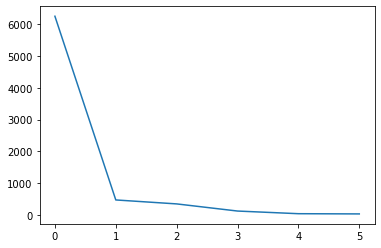

In [93]:
# print(df2[["vae","pve","gee","rqe","rle","cce"]])
from sklearn.decomposition import PCA
pca = PCA()
test = pca.fit_transform(df2[["vae","pve","gee","rqe","rle","cce"]])

plt.plot(pca.explained_variance_)
print(pca.explained_variance_ratio_)

print(pca.components_)
# print(test[:,0])
# pd.
# only 1 factor needed!

df3 = pd.DataFrame({
        "country": df2["country"],
        "Govt_trust_index": test[:,0]*(-1)
    })

In [87]:
print(df['country'])
df4 = df.merge(df3)
print(df4)

0            austria
1            belgium
2             brazil
3              chile
4            denmark
5             france
6            germany
7              italy
8             mexico
9        netherlands
10            norway
11          portugal
12      south africa
13             spain
14            sweden
15       switzerland
16    united kingdom
17     united states
Name: country, dtype: object
           country  population  week  year  total_deaths  covid_deaths  \
0          austria     8902600    36  2020  5.773900e+04         756.0   
1          belgium    11431406    31  2020  7.285300e+04        9724.0   
2           brazil   210147125    33  2020  8.867783e+05      107232.0   
3            chile    17574003    37  2020  9.126100e+04       12039.0   
4          denmark     5822763    36  2020  3.702500e+04         628.0   
5           france    64639133    35  2020  4.202650e+05       30661.0   
6          germany    83149300    33  2020  6.035600e+05        9243.0   
7

In [88]:
pf = ProfileReport(df4)
pf.to_widgets()